Attendance prediction based on total score
   totalscore    Attendance
0           5  28465.698271
1           2  27537.025293
2           1  27227.467633
3          10  30013.486569
4          25  34656.851462
Regression Based on Attendance and Total Score


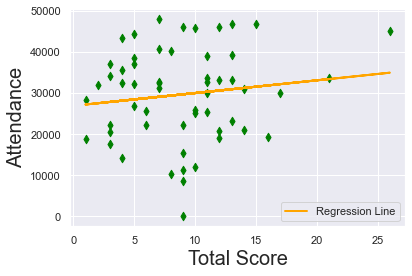

In [86]:
#Import stats packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

#Linear Regression Package
from sklearn.linear_model import LinearRegression

#Read csv
directory = "/Users/matthew.voss/downloads/"
data = pd.read_csv(directory + "games.csv")
games = pd.DataFrame(data)

#new columns
games['delayyn'] = (games['delay'] > 0)
games['delayyn'] = games['delayyn'].map({'True': 1, 'False': 0})
games['totalscore'] = (games['home_final_score'] + games['away_final_score'])
homewin = (games['home_final_score'] > games['away_final_score'])
homewinsonly = games.loc[homewin]

#Variables & View Data
y = homewinsonly['attendance']
x1 = homewinsonly['totalscore']
x_matrix = x1.values.reshape(-1,1)

#SKLearn Linear Regression
reg = LinearRegression()
reg.fit(x_matrix,y)

#R-squared
reg.score(x_matrix,y)

#Coefficients
reg.coef_

#Intercept}
reg.intercept_

#attendance prediction based on total score
new_data = pd.DataFrame(data=[5,2,1,10,25], columns=['totalscore'])
new_data
reg.predict(new_data)
new_data['Attendance'] = reg.predict(new_data)
print('Attendance prediction based on total score')
print(new_data)

#plot regression
print('Regression Based on Attendance and Total Score')
plt.scatter(x_matrix,y, c = 'green', marker = 'd')
yhat = (reg.coef_*x_matrix + reg.intercept_)
fig = plt.plot(x_matrix,yhat, lw = '2', c = 'orange', label = 'Regression Line')
plt.xlabel('Total Score', fontsize = 20)
plt.ylabel('Attendance', fontsize = 20)
plt.legend()
plt.show()